# try to load in intake

https://github.com/COSIMA/cosima-recipes/blob/main/Cooking-Lessons-101-Tutorials/Make_Your_Own_Intake_Datastore.ipynb

Seems like the datastore automatically gets updated by a payu postscript.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
PATH = "/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-Wright-spinup-accessom2IC-yr2"


In [5]:
import intake


In [6]:
esm_datastore = intake.open_esm_datastore(
    "/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-Wright-spinup-accessom2IC-yr2/intake_esm_ds.json", 
    columns_with_iterables=[
            "variable",
            "variable_long_name",
            "variable_standard_name",
            "variable_cell_methods",
            "variable_units",
    ] # This is important
)

esm_datastore

,unique
filename,422
file_id,40
path,3360
filename_timestamp,91
frequency,3
start_date,169
end_date,169
variable,190
variable_long_name,171
variable_standard_name,33


In [7]:
esm_datastore_yr1 = intake.open_esm_datastore(
    "/scratch/x77/cy8964/access-om3/archive/8km_jra_ryf_obc2-cascadelake-Charrassin-newparams-rerun-Wright-spinup-accessom2IC/intake_esm_ds.json", 
    columns_with_iterables=[
            "variable",
            "variable_long_name",
            "variable_standard_name",
            "variable_cell_methods",
            "variable_units",
    ] # This is important
)

esm_datastore_yr1

,unique
filename,62
file_id,40
path,480
filename_timestamp,13
frequency,3
start_date,24
end_date,25
variable,190
variable_long_name,171
variable_standard_name,33


In [5]:
ds = esm_datastore.search(variable="thetao", frequency="1mon").to_dask()


In [6]:
ds

<xarray.Dataset> Size: 157GB
Dimensions:  (time: 84, zl: 75, yh: 1442, xh: 4320)
Coordinates:
  * xh       (xh) float64 35kB -280.0 -279.9 -279.8 -279.7 ... 79.79 79.88 79.96
  * yh       (yh) float64 12kB -86.49 -86.47 -86.45 ... -37.63 -37.56 -37.5
  * zl       (zl) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.805e+03
  * time     (time) object 672B 1901-01-16 12:00:00 ... 1907-12-16 12:00:00
Data variables:
    thetao   (time, zl, yh, xh) float32 157GB dask.array<chunksize=(1, 15, 289, 864), meta=np.ndarray>
Attributes: (12/16)
    NumFilesInSet:                            1
    title:                                    ACCESS-OM3
    associated_files:                         areacello: access-om3.mom6.stat...
    grid_type:                                regular
    grid_tile:                                N/A
    intake_esm_vars:                          ['thetao']
    ...                                       ...
    intake_esm_attrs:variable_standard_name:  ,,,,,sea_water_potential_temper...
    intake_esm_attrs:variable_cell_methods:   ,,,,,area:mean zl:mean yh:mean ...
    intake_esm_attrs:variable_units:          degrees_east,degrees_north,mete...
    intake_esm_attrs:realm:                   ocean
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   access_om3_mom6_3d_thetao_1mon_...

In [10]:
variables = esm_datastore.unique().variable
print(variables)

['time', 'time_bounds', 'NCAT', 'VGRDi', 'VGRDs', 'VGRDb', 'VGRDa', 'blkmask', 'ANGLE', 'ANGLET', 'hi', 'hs', 'aice', 'uvel', 'vvel', 'frzmlt', 'congel', 'frazil', 'snoice', 'dvidtt', 'dvidtd', 'sifb', 'hi_m', 'hs_m', 'Tsfc_m', 'aice_m', 'uvel_m', 'vvel_m', 'uatm_m', 'vatm_m', 'sice_m', 'fswup_m', 'fswdn_m', 'flwdn_m', 'snow_ai_m', 'rain_ai_m', 'frzmlt_m', 'scale_factor_m', 'fswabs_ai_m', 'albsni_m', 'alvdr_ai_m', 'alidr_ai_m', 'alvdf_ai_m', 'alidf_ai_m', 'albice_m', 'albsno_m', 'flat_ai_m', 'fsens_ai_m', 'flwup_ai_m', 'evap_ai_m', 'Tair_m', 'congel_m', 'frazil_m', 'snoice_m', 'meltt_m', 'melts_m', 'meltb_m', 'meltl_m', 'fresh_ai_m', 'fsalt_m', 'fsalt_ai_m', 'fhocn_ai_m', 'fswthru_ai_m', 'strairx_m', 'strairy_m', 'strtltx_m', 'strtlty_m', 'strcorx_m', 'strcory_m', 'strocnx_m', 'strocny_m', 'strintx_m', 'strinty_m', 'strength_m', 'divu_m', 'shear_m', 'vort_m', 'dvidtt_m', 'dvidtd_m', 'daidtt_m', 'daidtd_m', 'trsig_m', 'ice_present_m', 'fcondtop_ai_m', 'fmeltt_ai_m', 'sifb_m', 'opening_m

In [ ]:
fig,axes = plt.subplots(figsize = (6,5),nrows = 2, sharex = True)

ds = esm_datastore.search(variable="thetaoga").to_dask()
ds.thetaoga.plot(ax = axes[0],label = "thetaoga")
ds1 = esm_datastore_yr1.search(variable="thetaoga").to_dask()
ds1.thetaoga.plot(ax = axes[0],label = "thetaoga",color = 'C0')
axes[0].set_title('Global Mean Temp')
axes[0].set_xlabel('')

ds = esm_datastore.search(variable="tosga").to_dask()
ds.tosga.plot(ax = axes[1],label = "tosga")
ds1 = esm_datastore_yr1.search(variable="tosga").to_dask()
ds1.tosga.plot(ax = axes[1],label = "tosga",color = 'C0')
axes[1].set_title('Global Mean SST')
axes[1].set_xlabel('Time (years)')

#plt.legend()

In [20]:
ds = esm_datastore.search(variable="aice_m").to_dask()


In [21]:
ds

<xarray.Dataset> Size: 4GB
Dimensions:  (time: 84, nj: 1442, ni: 4320)
Coordinates:
  * time     (time) object 672B 1901-01-16 12:00:00 ... 1907-12-16 12:00:00
Dimensions without coordinates: nj, ni
Data variables:
    aice_m   (time, nj, ni) float64 4GB dask.array<chunksize=(1, 181, 720), meta=np.ndarray>
Attributes: (12/20)
    title:                                    access-om3
    contents:                                 Diagnostic and Prognostic Varia...
    source:                                   CICE Sea Ice Model, unknown_ver...
    comment:                                  All years have exactly 365 days
    comment3:                                 seconds elapsed into model date...
    time_period_freq:                         month_1
    ...                                       ...
    intake_esm_attrs:variable_standard_name:  ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...
    intake_esm_attrs:variable_cell_methods:   ,,,,,,,,,,time: mean,time: mean...
    intake_esm_attrs:variable_units:          days since 1900-01-01 00:00:00,...
    intake_esm_attrs:realm:                   seaIce
    intake_esm_attrs:_data_format_:           netcdf
    intake_esm_dataset_key:                   access_om3_cice_1mon_mean_XXXX_...

Text(0.5, 0, 'Time (years)')

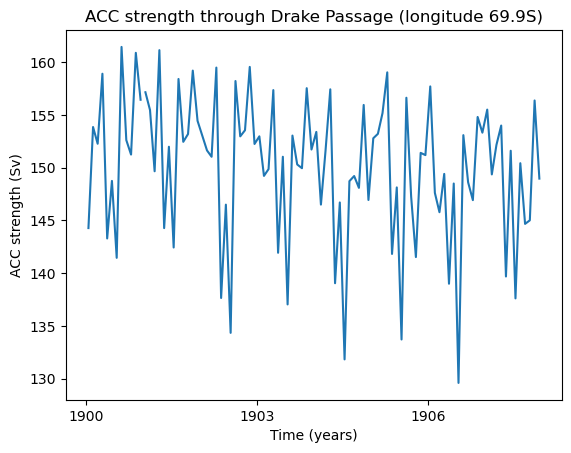

In [10]:
#ACC transport

umo = esm_datastore.search(variable="umo_2d").to_dask()
#drake passage transport
rho = 1035
(umo.umo_2d.sel(xq = -69.9, method = 'nearest')/1035/1e6).sum('yh').plot()#.sum('yh').values
#vol transport through drake passage = umo (kg/s) /rho_0
umo_1 = esm_datastore_yr1.search(variable="umo_2d").to_dask()
(umo_1.umo_2d.sel(xq = -69.9, method = 'nearest')/1035/1e6).sum('yh').plot(color = 'C0')#.sum('yh').values

plt.title('ACC strength through Drake Passage (longitude 69.9S)')
plt.ylabel('ACC strength (Sv)')
plt.xlabel('Time (years)')

In [5]:
from dask.distributed import Client

client = Client()
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43443 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/43443/status,
Dashboard: /proxy/43443/status,Workers: 7
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33083,Workers: 7
Dashboard: /proxy/43443/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:33295,Total threads: 4
Dashboard: /proxy/45227/status,Memory: 17.88 GiB
Nanny: tcp://127.0.0.1:37481,


2025-07-13 11:22:32,511 - distributed.nanny - WARNING - Restarting worker
2025-07-13 11:24:48,437 - distributed.nanny - WARNING - Restarting worker


(1037.5, 1032.0)

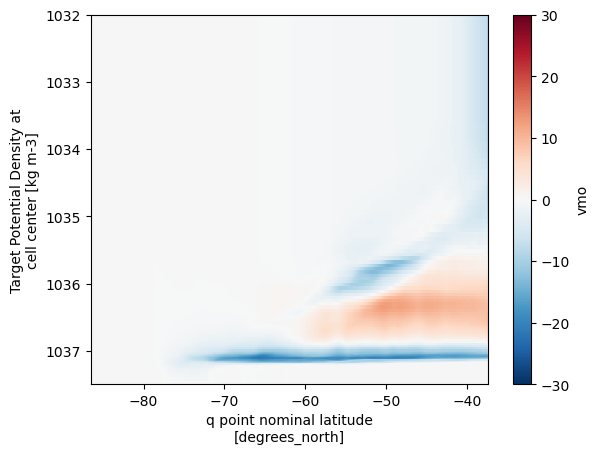

In [6]:
#overturning streamfunc in eighth year
vmo = esm_datastore.search(variable="vmo").to_dask()
vmo = vmo.vmo.isel(time = np.arange(-12,0)).mean("time")
vmo = vmo.load()

rho0 = 1035
Psi =(vmo.sum('xh')/rho0).cumsum('rho2_l') -  (vmo.sum('xh')/rho0).sum('rho2_l')

(Psi/1e6).plot(y = 'rho2_l', yincrease = False, vmax = 30, vmin = -30, cmap = 'RdBu_r')
plt.ylim(1037.5,1032)

Text(0.5, 0, 'Latitude ($^\\circ$N)')

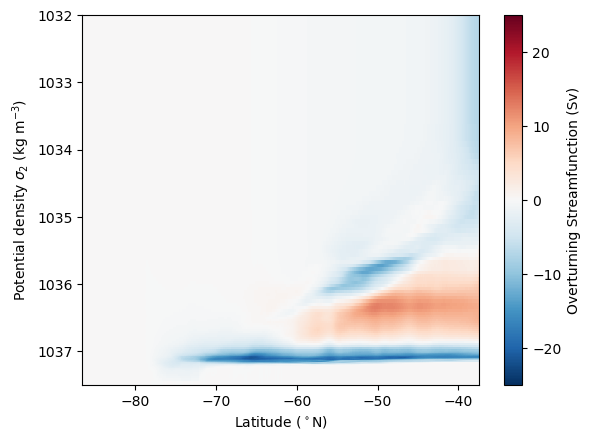

In [9]:
(Psi/1e6).plot(y = 'rho2_l', yincrease = False, vmax = 25, vmin = -25, cmap = 'RdBu_r',
              cbar_kwargs = {'label':'Overturning Streamfunction (Sv)'})
# (Psi/1e6).plot.contour(y = 'rho2_l', yincrease = False, colorbar = False, 
#                        levels = np.arange(-25,26,5),colors = 'k')
plt.ylim(1037.5,1032)
plt.ylabel('Potential density $\sigma_2$ (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')

In [7]:
Psi

<xarray.DataArray 'vmo' (rho2_l: 99, yq: 1443)> Size: 571kB
array([[       0. ,        0. ,        0. , ..., -3448125. , -3487031.2,
        -3877793.5],
       [       0. ,        0. ,        0. , ..., -7323365.5, -7268001. ,
        -8967179. ],
       [       0. ,        0. ,        0. , ..., -7301602.5, -7205375. ,
        -9201896. ],
       ...,
       [       0. ,        0. ,        0. , ...,        0. ,        0. ,
               0. ],
       [       0. ,        0. ,        0. , ...,        0. ,        0. ,
               0. ],
       [       0. ,        0. ,        0. , ...,        0. ,        0. ,
               0. ]], dtype=float32)
Coordinates:
  * rho2_l   (rho2_l) float64 792B 1.016e+03 1.033e+03 ... 1.037e+03 1.038e+03
  * yq       (yq) float64 12kB -86.5 -86.48 -86.46 ... -37.59 -37.53 -37.46